<a href="https://colab.research.google.com/github/greeen13/css-exercises/blob/main/diffusers_doc/en/pytorch/img2img.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text-guided image-to-image generation

The [StableDiffusionImg2ImgPipeline](https://huggingface.co/docs/diffusers/main/en/api/pipelines/stable_diffusion/img2img#diffusers.StableDiffusionImg2ImgPipeline) lets you pass a text prompt and an initial image to condition the generation of new images.

Before you begin, make sure you have all the necessary libraries installed:

In [2]:
# uncomment to install the necessary libraries in Colab
!pip install diffusers transformers ftfy accelerate

Get started by creating a [StableDiffusionImg2ImgPipeline](https://huggingface.co/docs/diffusers/main/en/api/pipelines/stable_diffusion/img2img#diffusers.StableDiffusionImg2ImgPipeline) with a pretrained Stable Diffusion model like [`nitrosocke/Ghibli-Diffusion`](https://huggingface.co/nitrosocke/Ghibli-Diffusion).

In [3]:
import torch
import requests
from PIL import Image
from io import BytesIO
from diffusers import StableDiffusionImg2ImgPipeline

device = "cuda"
pipe = StableDiffusionImg2ImgPipeline.from_pretrained("nitrosocke/Ghibli-Diffusion", torch_dtype=torch.float16).to(
    device
)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Download and preprocess an initial image so you can pass it to the pipeline:

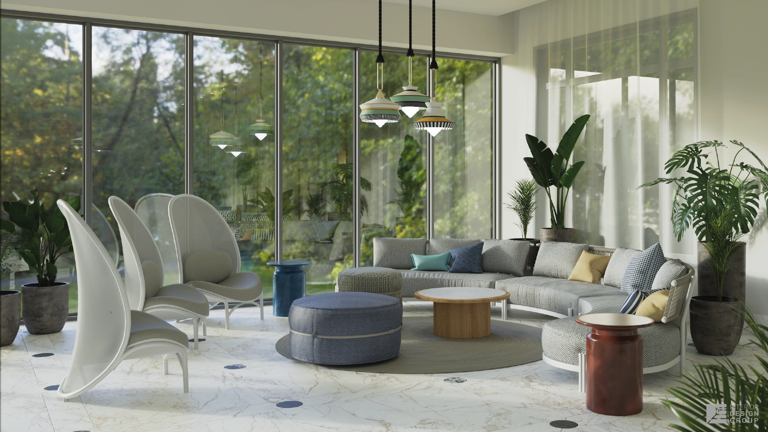

In [4]:
from PIL import Image

# Use Image.open directly for local files
init_image = Image.open("/content/Rajztábla 39.png").convert("RGB")
init_image.thumbnail((768, 768))
init_image

In [9]:
!pip install open_clip_torch


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 27.8 MB/s eta 0:00:00


In [10]:
from transformers import BlipProcessor, BlipForConditionalGeneration
import torch
from PIL import Image
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base").to("cuda")
raw_image = Image.open("/content/Rajztábla 39.png").convert("RGB")  # Replace with your image path
inputs = processor(raw_image, return_tensors="pt").to("cuda")
out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))

preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

a living room with a large window and a large couch


  0%|          | 0/10 [00:00<?, ?it/s]

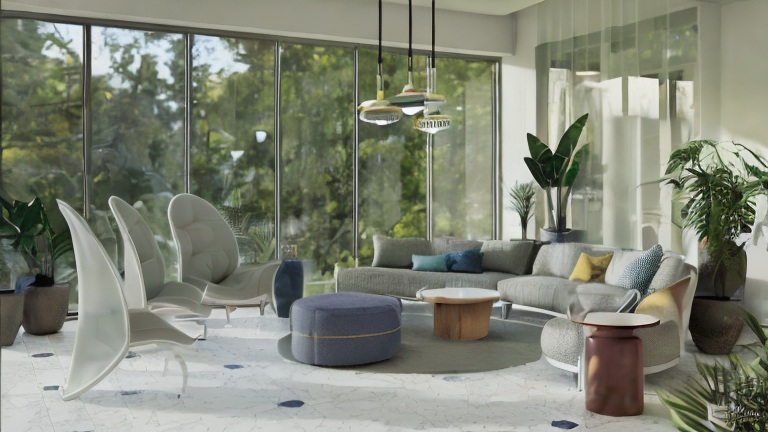

In [21]:
prompt = "Cinematic photo of a living room with a large window and a large couch. 35mm photograph, film, professional, 4k, highly detailed."
generator = torch.Generator(device=device).manual_seed(1024)
image = pipe(prompt=prompt, image=init_image, strength=0.2, guidance_scale=7.5, generator=generator).images[0]
image

<div class="flex justify-center">
    <img src="https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/ghibli-castles.png"/>
</div>

You can also try experimenting with a different scheduler to see how that affects the output:

In [ ]:
from diffusers import LMSDiscreteScheduler

lms = LMSDiscreteScheduler.from_config(pipe.scheduler.config)
pipe.scheduler = lms
generator = torch.Generator(device=device).manual_seed(1024)
image = pipe(prompt=prompt, image=init_image, strength=0.75, guidance_scale=7.5, generator=generator).images[0]
image

<div class="flex justify-center">
    <img src="https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/lms-ghibli.png"/>
</div>

Check out the Spaces below, and try generating images with different values for `strength`. You'll notice that using lower values for `strength` produces images that are more similar to the original image.

Feel free to also switch the scheduler to the [LMSDiscreteScheduler](https://huggingface.co/docs/diffusers/main/en/api/schedulers/lms_discrete#diffusers.LMSDiscreteScheduler) and see how that affects the output.

<iframe
	src="https://stevhliu-ghibli-img2img.hf.space"
	frameborder="0"
	width="850"
	height="500"
></iframe>